IF YOU'RE RUNNING FROM COLAB, RUN THIS CELL

In [ ]:
# Sostituisci con il tuo token e il link alla tua repo
token = "token"
username = "leonardodegrandis"
repo = "stunning-enigma"
#prova a pushare
!git clone https://{token}@github.com/{username}/{repo}.git


import os
os.chdir("stunning-enigma")  # cambia con il nome della cartella del repo

# Disinstallare la versione corrente di PyTorch
!pip uninstall -y torch torchvision torchaudio

# Installare PyTorch 2.4 e torchvision 0.19
!pip install torch==2.4.0 torchvision==0.19.0 torchaudio==2.4.0

!pip install torch_geometric
!pip install pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.4.0+cu121.html
!pip install umap-learn -q
!pip install ogb

LOAD YOUR MODEL AND ENCODE SAMPLES, set n_sample to NONE if you want alle the nodes
COMPUTE AND PLOT ALIGNMENT MATRIX BETWEEN INTERMEDIATE LAYERS

In [1]:
from src.downstream.downstream_proteins import downstream_proteins
from src.postprocessing.functions import setup, plot_norm_ratios
%matplotlib inline
run = 'vgae-infomax/run_6'
checkpoint = 'checkpoint_3000'
z, labels, parser, model_loader, device = setup(run=run, checkpoint=checkpoint, n_samples=5000, return_layers=False, shuffle_samples=True)

/opt/anaconda3/envs/pyg_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


DeepGraphInfomax


/Users/filippostaffoni/Documents/stunning-enigma/src/utils/model_loader.py:47: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict=torch.load(root.joinpath('runs', run,

DeepGraphInfomax


/Users/filippostaffoni/Documents/stunning-enigma/src/data/load_ogbl_biokg_homo.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(os.path.join(folder_pat

Model: DeepGraphInfomax
Samples: torch.Size([5000, 512])


In [12]:
import torch

ckpt = torch.load("runs/supervised/run_1/checkpoint_3000.pt", map_location=torch.device("cpu"))
print(ckpt)


OrderedDict([('encoder.node_embedding.weight', tensor([[-3.5232e-02, -9.4865e-04,  1.0872e-01, -3.0512e-01, -8.2204e-02,
         -4.5793e-02, -1.1890e-01,  1.7251e-01,  1.5481e-01,  8.7933e-03,
         -1.0044e-01, -5.0072e-02, -2.9303e-01, -9.0433e-02,  5.9713e-03,
          1.2721e-01,  1.0060e-01,  3.7953e-02, -5.8890e-02, -8.8500e-02,
          2.3885e-01, -2.2302e-03, -1.5608e-01, -1.2623e-01, -1.9897e-01,
          1.8858e-02,  8.3494e-02, -1.5972e-03,  6.4703e-02,  1.6335e-02,
          4.1553e-01,  7.0532e-02, -1.5363e-01,  1.5398e-01,  1.5061e-01,
          4.9384e-02,  1.8315e-01,  1.1191e-01,  9.5964e-02,  1.0262e-01,
         -4.7910e-02,  1.6406e-01,  2.0305e-01, -6.7998e-02, -1.2524e-03,
          4.8920e-02,  2.1986e-01,  1.5657e-01,  1.4449e-02, -1.1139e-01,
          3.4903e-02,  2.1316e-02, -7.2483e-02,  1.7405e-01, -9.8426e-02,
          6.4585e-02, -4.3914e-02,  8.6316e-03,  1.3362e-01,  8.2300e-02,
         -1.9496e-01, -1.3531e-01,  3.6017e-02,  2.0288e-02,  2.2

/var/folders/zh/ymws8vv55_bcd4hfyt3fcpp40000gn/T/ipykernel_3642/2479958940.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("runs/supervised/run_1/check

In [ ]:
from src.postprocessing.functions import compute_alignment_matrix, plot_alignment_matrix

alignment_matrix = compute_alignment_matrix(parser.intermediate_layers, metric='cka')
plot_alignment_matrix(alignment_matrix)


COMPUTE AND PLOT NORM RATIOS BETWEEN INTERMEDIATE LAYERS

In [ ]:
from src.postprocessing.functions import compute_norm_ratios

layers = parser.intermediate_layers
skip_idx = [0, 2, 4, 6]
skip_connections = [layers[idx] for idx in skip_idx]
long_branch_idx = [1, 3, 5, 7]
long_branch_outputs = [layers[idx] for idx in long_branch_idx]

norm_ratios = compute_norm_ratios(skip_connections, long_branch_outputs)

for i, ratio in enumerate(norm_ratios):
    print(f"Layer {i+1}: Norm Ratio = {ratio:.4f}")

# You can also visualize these ratios
import matplotlib.pyplot as plt
plot_norm_ratios(norm_ratios)

PLOT EMBEDDING NORMS

In [ ]:
from src.postprocessing.functions import plot_embedding_norms

mlp_idx = [3,7]
mlp_embeddings = [layers[idx] for idx in mlp_idx]
attn_idx = [1, 5]
attention_embeddings = [layers[idx] for idx in attn_idx]

plot_embedding_norms(mlp_embeddings, attention_embeddings)
plt.show()

PLOT VARIANCE DISTRIBUTION

In [ ]:
from src.postprocessing.distributions import *
fig = feature_variance_dstribution(z, num_samples=5000)
plt.show()

PLOT REDUCTION

AttributeError: 'LatexManager' object has no attribute 'latex'

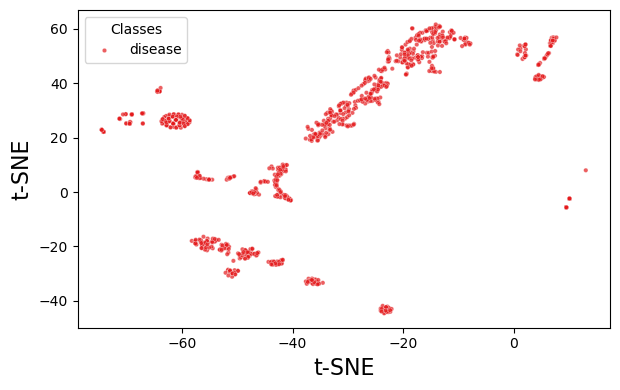

In [2]:
from src.postprocessing import *
#plot_reductions(z, labels[:,108], method='t-SNE')
plot_reductions(z, labels, method='t-SNE')
plt.show()

In [ ]:
from src.downstream.run_biokg_downstream import run_downstream_for_run
run_downstream_for_run(run_path="vgae-infomax/run_6", checkpoint="checkpoint_3000", complete_data=True, plot_tsne=True)

COMPUTE EMBEDDING DISTANCE (INTERMEDIATE LAYERS)

In [ ]:
from src.postprocessing.functions import compute_embedding_distances

distances = compute_embedding_distances(parser.intermediate_layers)
x = 1
for dist in distances:
    print(f'avg distance between layer {x} and layer {x + 1}: {dist}')
    x += 1


PLOT TRAJECTORIES

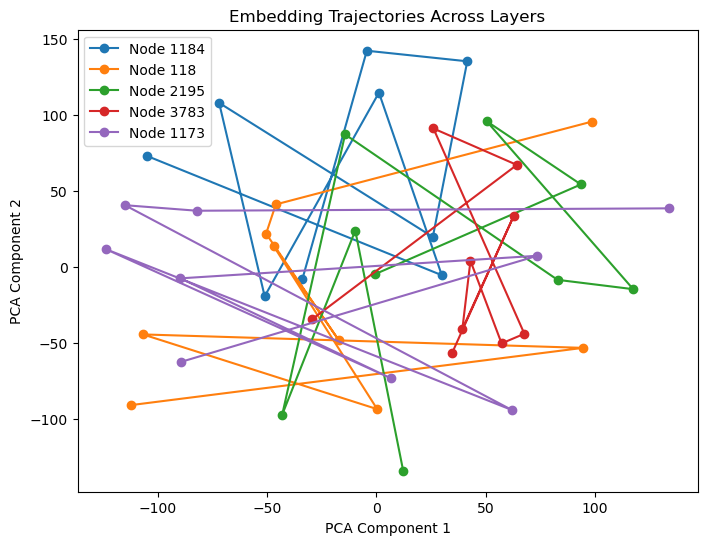

In [3]:
from src.postprocessing.functions import plot_embedding_trajectory

# USAGE EXAMPLE:
plot_embedding_trajectory(embeddings_per_layer=parser.intermediate_layers, num_nodes=5, labels=labels)


DOWNSTREAM FOR PROTEINS

In [3]:


# Assuming you have:
# z: numpy array of shape [n_samples, embedding_size]
# labels: numpy array of shape [n_samples] with binary values (0, 1)

data = parser._load_dataset(parser, "Proteins")
downstream_proteins(data, z, labels)

/opt/anaconda3/envs/pyg_env/lib/python3.10/site-packages/ogb/nodeproppred/dataset_pyg.py:69: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.data, self.slices = torch.loa

TypeError: XGBClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'

In [ ]:
labels.shape

CLASS DISTRIBUTION FOR PROTEINS

In [ ]:
import numpy as np
labels_test = labels[data.test_idx, :]
for task in range(labels.shape[1]):
    class_dist = np.bincount(labels_test[:, task])
    print(f"Task {task}: Class distribution = {class_dist}")


TEST SUPERVISED FOR BIOKG

In [ ]:
from src.test_supervised_biokg.test_supervised import test_supervised

model = model_loader._load_model(run, checkpoint)
test_loss, auc_score, acc, preds = test_supervised(model.to(device), z, parser.test_data, device)